In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex
%matplotlib inline

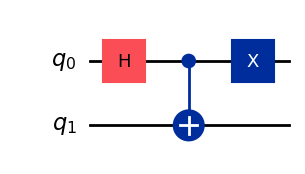

In [2]:
circuit = QuantumCircuit(2)
circuit.h(0)
# UPDATE: cnot() name deprecated in Qiskit 1.0; use cx() instead
circuit.cx(0, 1)
circuit.x(0)
circuit.draw(output='mpl')

In [3]:
# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
circuit.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(circuit)
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

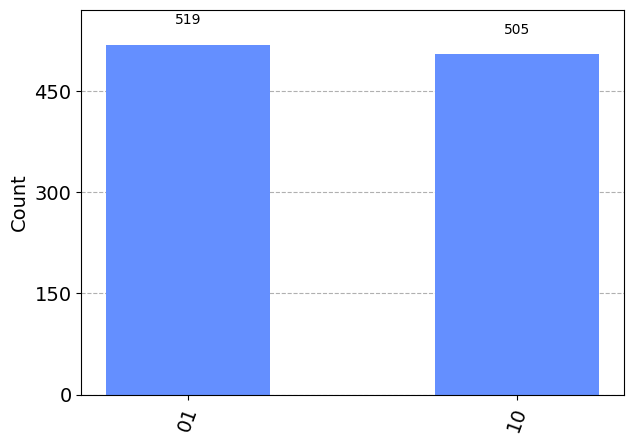

In [4]:
circuit.measure_all()

# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts())